In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# set up the grid! 
N=200
x_start, x_end= -4.0, 4.0
y_start, y_end= -2.0, 2.0
x=numpy.linspace(x_start, x_end, N)
y=numpy.linspace(y_start, y_end, N)
X, Y=numpy.meshgrid(x, y)

# create the freestream!
u_inf=1.0
u_freestream=u_inf*numpy.ones((N, N), dtype=float)
v_freestream=numpy.zeros((N,N),dtype=float)

# compute the freestream function
psi_freestream=u_inf*Y

In [3]:
# get the velocity!

def vel(strength, xs, ys, X, Y):
    u=strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v=strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u,v

In [4]:
# get the stream function!

def stream_func(strength, xs, ys, X, Y):
    psi=strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    return psi

In [5]:
# call everything!

strength_source=5.0
x_source, y_source=-1.0, 0.0

u_source, v_source=vel(strength_source, x_source, y_source, X, Y)
psi_source=stream_func(strength_source, x_source, y_source, X, Y)

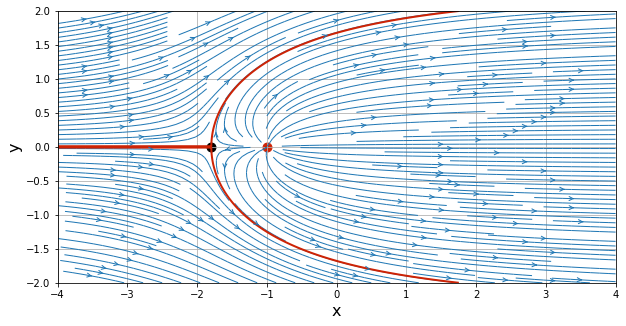

In [6]:
# superimpose the source of the freestream
u=u_freestream + u_source
v=v_freestream + v_source
psi=psi_freestream + psi_source 

width =10
height=5
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o');

# want ot find the stagnation point where u=v=0
# so need to set u and v eqns to 0
x_stag=x_source-(strength_source/(2*numpy.pi*u_inf))
y_stag=y_source
#print(x_stag)

# plot it out!
pyplot.scatter(x_stag, y_stag, color='k', s=80, marker='o')
pyplot.contour(X, Y, psi,levels=[-strength_source / 2, strength_source / 2], 
               colors='#CD2305', linewidths=2, linestyles='solid'); 

Challenge: what is the max width of the Rankine Half Body?

Hint: use mass conservation, and think about when x is very large.

=> if we use the law of superposition to get an eqn for the stream function that is based on both the source and the uniform flow, we can then plug in the coordinatess of the stagnation point and the source / sink points to get an equation for the stream function. 

=> if we then assume that x approaches infinity then we can say that tan^-1() will approach 0 so the stream function will just be equal to U_inf x y, and we can solve for y which is the width of half the Rankine Half Body.

In [7]:
# solve for the half width of the rankine half body:

stream_s=strength_source/2
h_rank_half=stream_s/u_inf

print('This is half the height of the Rankine Half Body: '+str(h_rank_half))

This is half the height of the Rankine Half Body: 2.5


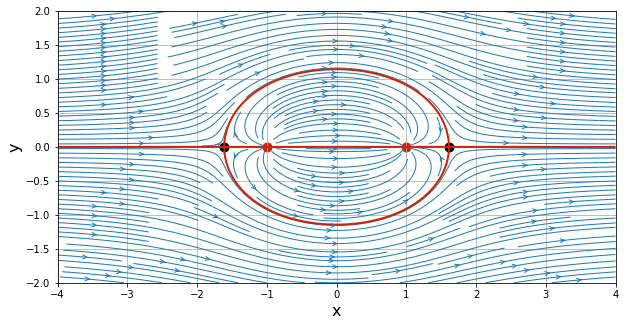

In [8]:
strength_sink=-5.0
x_sink, y_sink=1.0, 0.0

# get the velocity feild
u_sink, v_sink=vel(strength_sink, x_sink, y_sink, X, Y)
psi_sink=stream_func(strength_sink, x_sink, y_sink, X, Y)

#use superposition:
u=u_freestream + u_source + u_sink
v=v_freestream + v_source + v_sink
psi=psi_freestream + psi_source + psi_sink

# want ot find the stagnation point where u=v=0
# so need to set u and v eqns to 0
m_source=strength_source/(2*numpy.pi)
#print('this is m: '+str(m_source))
m_sink=strength_sink/(2*numpy.pi)
#print('this is m: '+str(m_sink))
x_stag_source=x_source*((1+(2*numpy.abs(m_source)/(numpy.abs(x_source) *u_inf)))**0.5)
#print(x_stag_source)
#print(x_source)
x_stag_sink=x_sink*((1+(2*numpy.abs(m_sink)/(numpy.abs(x_sink) *u_inf)))**0.5)
y_stag=y_source
x_width=x_stag_sink-x_stag_source
#print(x_width)

#plot the streamlines:
width=10
height=5
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o');
pyplot.contour(X, Y, psi, levels=[0.0], colors='#CD2305', linewidths=2, linestyles='solid');

# plot it out!
pyplot.scatter(x_stag_source, y_stag, color='k', s=80, marker='o');
pyplot.scatter(x_stag_sink, y_stag, color='k', s=80, marker='o');

Challenge Question: what is the length and width of the Rankine oval?

This is the width of the rakine oval: 3.2196580134659976


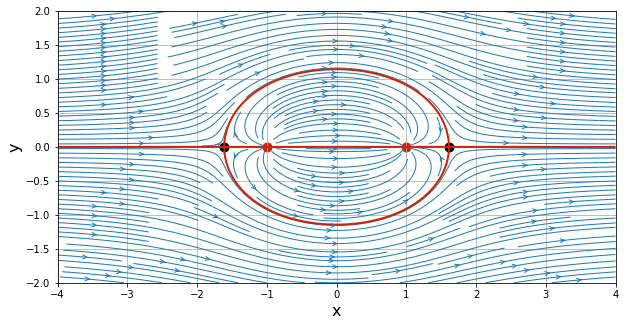

In [9]:
#from sympy import *
# see notes for derivation

# find the width of the rankine oval
rank_w=x_stag_sink-x_stag_source
print('This is the width of the rakine oval: ' +str(rank_w))

'''
# find the height of half of the rankine oval
h=symbols('h')
a=strength_source/(2*numpy.pi*u_inf)
m=strength_source/(2*numpy.pi)
solve((h/numpy.abs(x_source))-(1/(tan((h/a)/(2*m/(u_inf*numpy.abs(x_source)))))), h)
print(h)'''

#plot the streamlines:
width=10
height=5
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o');
pyplot.contour(X, Y, psi, levels=[0.0], colors='#CD2305', linewidths=2, linestyles='solid');

# plot it out!
pyplot.scatter(x_stag_source, y_stag, color='k', s=80, marker='o');
pyplot.scatter(x_stag_sink, y_stag, color='k', s=80, marker='o');
#pyplot.scatter(psi[100], [100], color='m', s=80, marker='o');

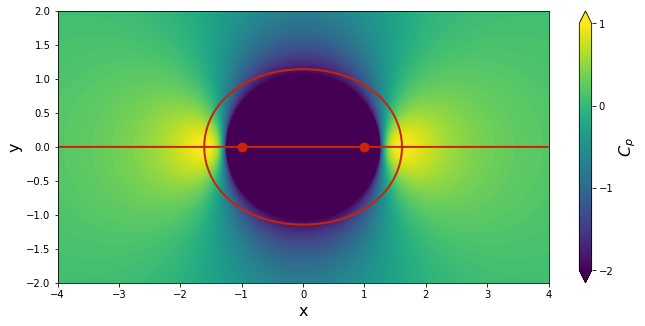

In [10]:
# compute the pressure coefficient field
cp=1.0-(u**2 + v**2)/u_inf**2

# plot it out
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
               color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');